In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#makes plots appear in the notebook
%matplotlib inline

In [2]:
titanic=pd.read_csv('train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(array([30., 17., 15.,  9., 29., 64., 67., 70., 83., 62., 51., 40., 35.,
        27., 35., 23., 15.,  9., 11., 11.,  4.,  2.,  3.,  1.,  1.]),
 array([ 0.42  ,  3.6032,  6.7864,  9.9696, 13.1528, 16.336 , 19.5192,
        22.7024, 25.8856, 29.0688, 32.252 , 35.4352, 38.6184, 41.8016,
        44.9848, 48.168 , 51.3512, 54.5344, 57.7176, 60.9008, 64.084 ,
        67.2672, 70.4504, 73.6336, 76.8168, 80.    ]),
 <BarContainer object of 25 artists>)

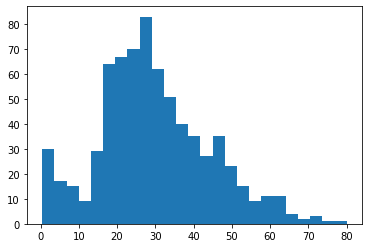

In [5]:
plt.hist(titanic.Age,25)

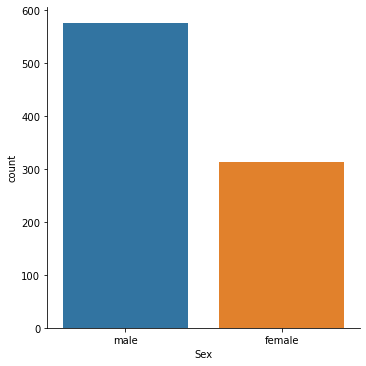

In [6]:
sns.catplot(x="Sex",data=titanic, kind='count')

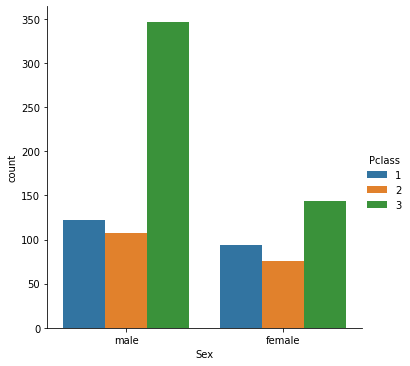

In [7]:
sns.catplot(x='Sex',data=titanic,kind='count',hue='Pclass')

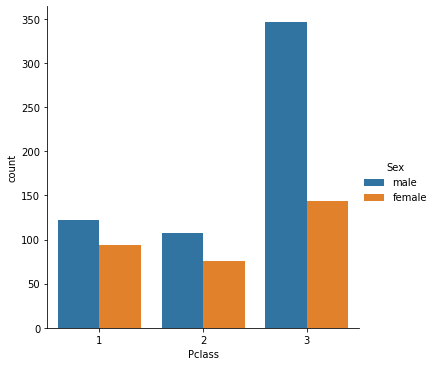

In [8]:
sns.catplot(x='Pclass', data=titanic,kind='count',hue='Sex')

In [9]:
def male_female_child(passenger):
    age,sex=passenger
    if age<16:
        return 'child'
    else:
            return sex

In [10]:
titanic['person']=titanic[['Age','Sex']].apply(male_female_child,axis=1)

In [11]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


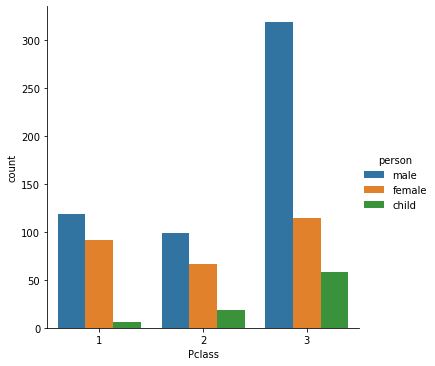

In [12]:
sns.catplot(x='Pclass',data=titanic,kind='count',hue='person')

<AxesSubplot:>

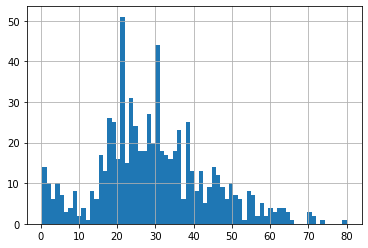

In [13]:
titanic['Age'].hist(bins=70)

In [14]:
titanic['Age'].mean()

29.69911764705882

In [15]:
titanic['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

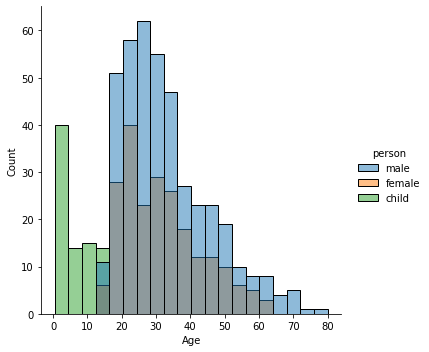

In [16]:
sns.displot(x='Age',data=titanic,hue='person')

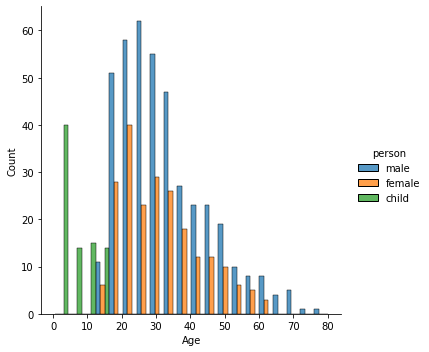

In [17]:
sns.displot(x='Age',data=titanic,hue='person',multiple='dodge')

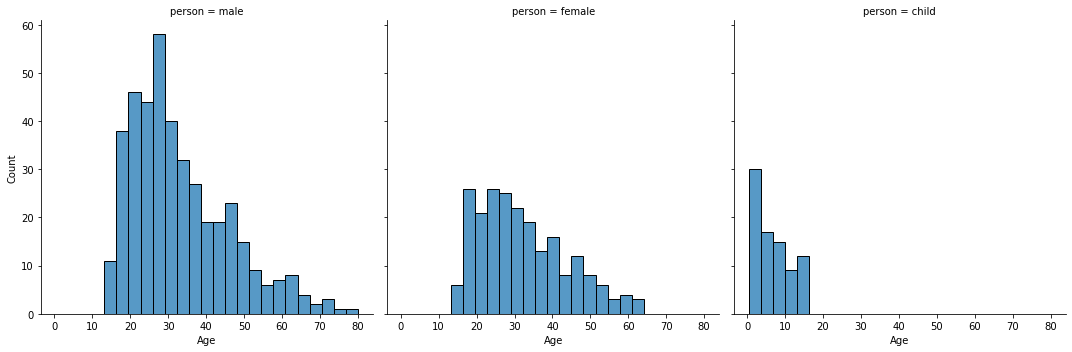

In [18]:
sns.displot(x='Age',data=titanic,col='person',bins=25)

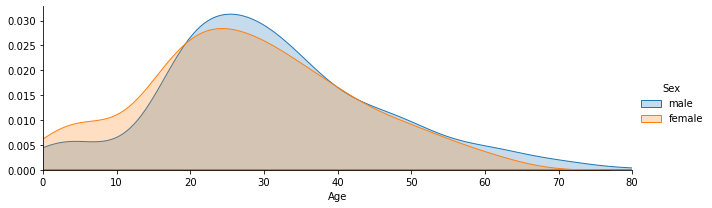

In [19]:
fig=sns.FacetGrid(data=titanic,hue='Sex', aspect=3)
fig.map(sns.kdeplot,'Age',shade=True)

oldest=titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

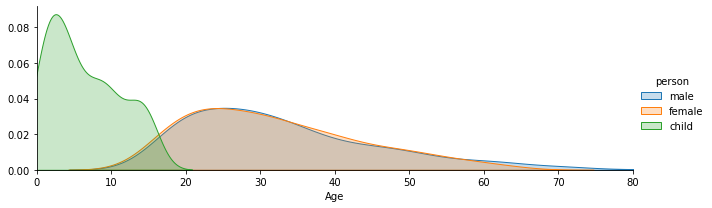

In [20]:
fig1=sns.FacetGrid(data=titanic,hue='person', aspect=3)
fig1.map(sns.kdeplot,'Age',shade=True)

oldest=titanic['Age'].max()
fig1.set(xlim=(0,oldest))
fig1.add_legend()

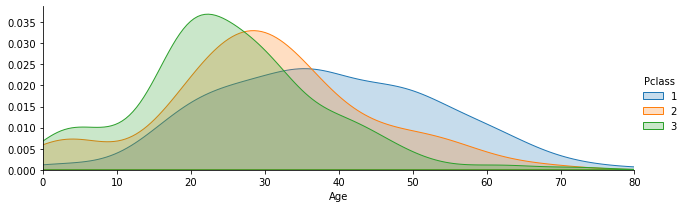

In [21]:
fig=sns.FacetGrid(data=titanic,hue='Pclass', aspect=3)
fig.map(sns.kdeplot,'Age',shade=True)

oldest=titanic['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [23]:
deck=titanic['Cabin'].dropna()

In [24]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

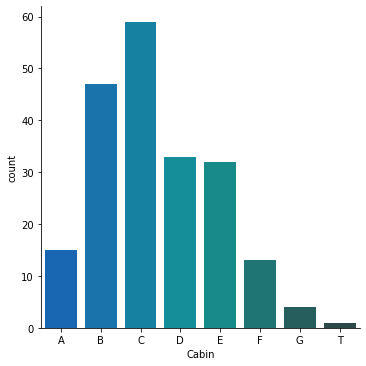

In [25]:
levels=[]
for level in deck:
    levels.append(level[0])
    
cabin=DataFrame(levels)
cabin.columns=['Cabin']
sns.catplot(x='Cabin',data=cabin, kind='count', 
            palette='winter_d',
            order=['A','B','C','D','E','F','G','T'])

In [26]:
cabin=cabin[cabin.Cabin != 'T']

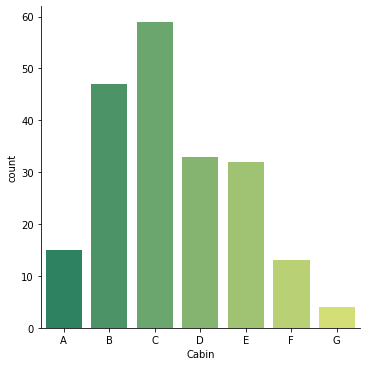

In [27]:
sns.catplot(x='Cabin',data=cabin, kind='count', 
            palette='summer',
            order=['A','B','C','D','E','F','G'])

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


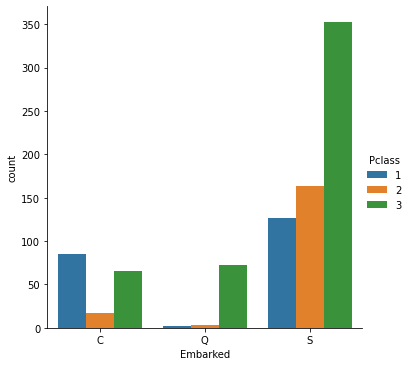

In [29]:
sns.catplot(x='Embarked', data=titanic,kind='count',hue='Pclass',
            order=['C','Q','S'])

In [30]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [31]:
titanic['alone']=titanic.SibSp+titanic.Parch

In [32]:
titanic['alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: alone, Length: 891, dtype: int64

In [33]:
titanic['alone'].loc[titanic['alone']>0]='with family'
titanic['alone'].loc[titanic['alone']==0]='alone'

/opt/Miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [34]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone


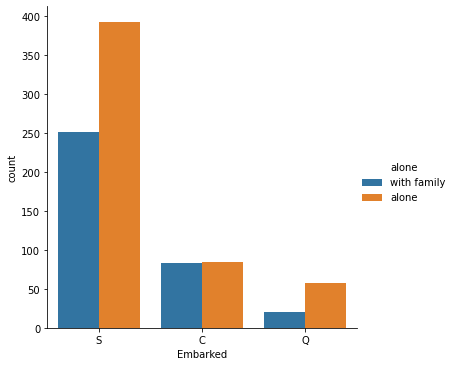

In [35]:
sns.catplot(x='Embarked',data=titanic,hue='alone',kind='count')

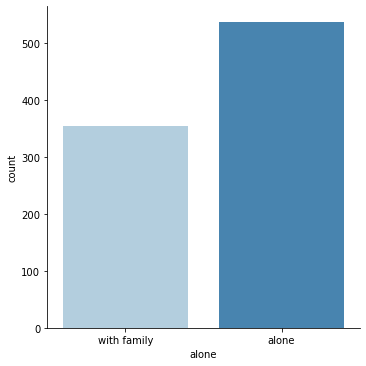

In [36]:
sns.catplot(x='alone',data=titanic,palette='Blues',kind='count')

In [37]:
titanic['survivor']=titanic.Survived.map({0:'no',1:'yes'})

In [38]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,alone,survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone,no


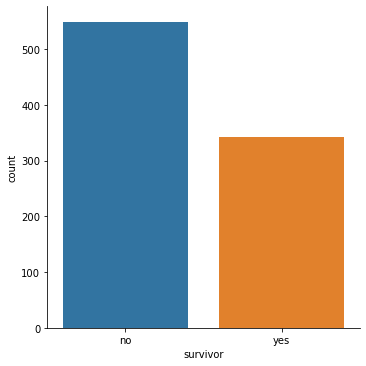

In [39]:
sns.catplot(x='survivor',data=titanic,kind='count')

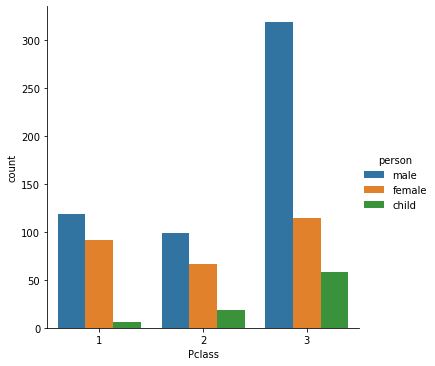

In [40]:
sns.catplot(x='Pclass',data=titanic,kind='count',hue='person')

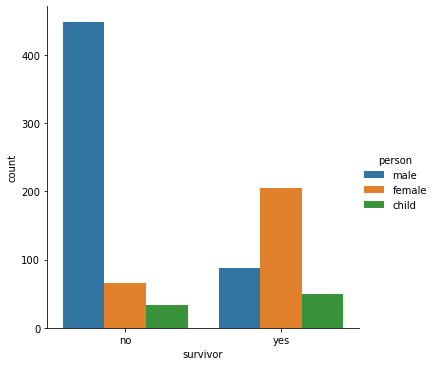

In [41]:
sns.catplot(x='survivor',data=titanic,kind='count',hue='person')

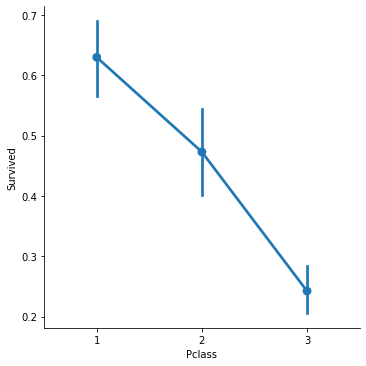

In [42]:
sns.catplot(x='Pclass',y='Survived',data=titanic,kind='point')

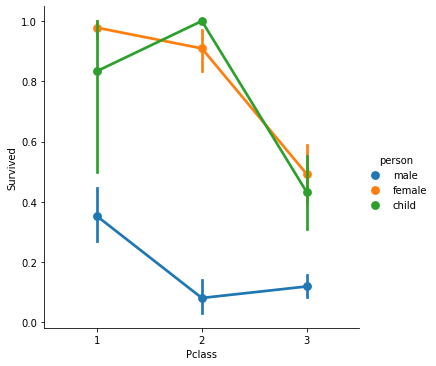

In [43]:
sns.catplot(x='Pclass',y='Survived',data=titanic,kind='point',hue='person')

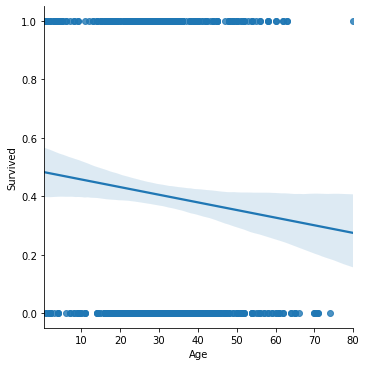

In [44]:
sns.lmplot(x='Age',y='Survived',data=titanic)

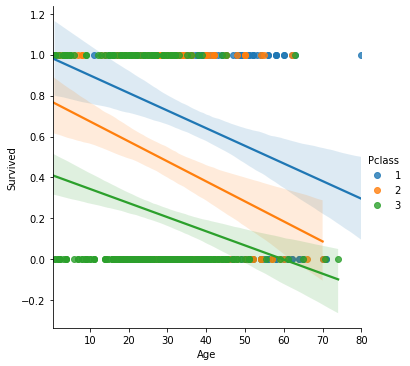

In [45]:
sns.lmplot(x='Age',y='Survived',data=titanic,hue='Pclass')

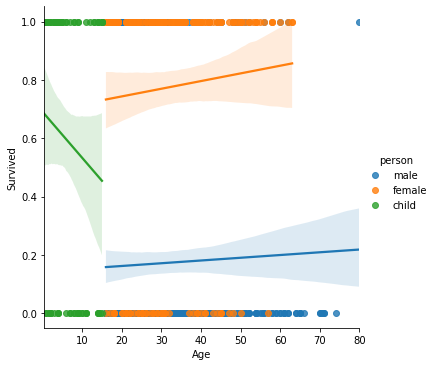

In [46]:
sns.lmplot(x='Age',y='Survived',data=titanic,hue='person')

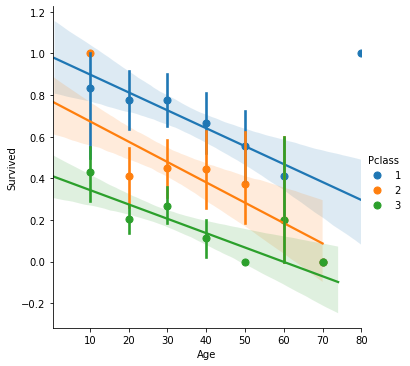

In [49]:
generations=[10,20,30,40,50,60,70,80]
sns.lmplot(x='Age',y='Survived',data=titanic, hue='Pclass',x_bins=generations)

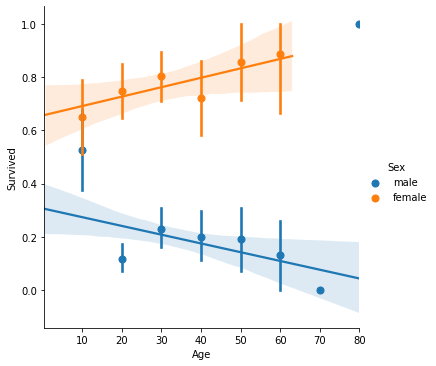

In [50]:
sns.lmplot(x='Age',y='Survived',data=titanic,hue='Sex',x_bins=generations)

In [51]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,alone,survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone,no


In [64]:
titanic['deck']=titanic['Cabin'].astype(str).str[0]


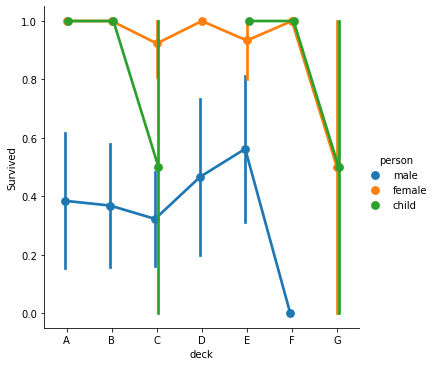

In [79]:
sns.catplot(x='deck',y='Survived',data=titanic,kind='point',
            order=['A','B','C','D','E','F','G'],hue='person',dodge=True)

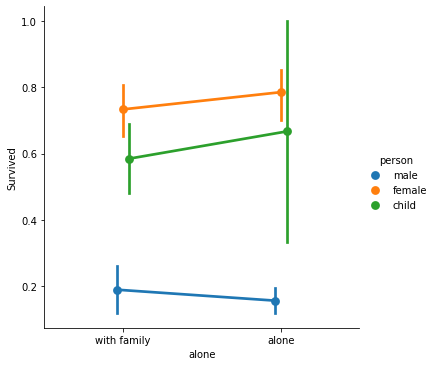

In [81]:
sns.catplot(x='alone',y='Survived',data=titanic,kind='point',
            hue='person',dodge=True)